# Tratamento de dados com pandas

## Exemplo 1

In [2]:
import pandas as pd

data = {
    "Produto": ["Arroz", "Feijão", "Macarrão"],
    "Preço": [15.00, 10.00, 8.50],
    "Quantidade": [100, 200, 150]
}
df = pd.DataFrame(data)

Selecionar colunas

In [3]:
df["Produto"]

,Produto
0,Arroz
1,Feijão
2,Macarrão


In [4]:
df.Produto

,Produto
0,Arroz
1,Feijão
2,Macarrão


In [5]:
df[["Produto", "Quantidade"]]

,Produto,Quantidade
0,Arroz,100
1,Feijão,200
2,Macarrão,150


Filtrar dados

In [6]:
df["Preço"] >= 10

,Preço
0,True
1,True
2,False


In [7]:
df[df["Preço"] >= 10]

,Produto,Preço,Quantidade
0,Arroz,15.0,100
1,Feijão,10.0,200


Adicionar coluna

In [8]:
df["Valor Total"] = df["Preço"] * df["Quantidade"] # Se não existir, ele criaa a coluna
df

,Produto,Preço,Quantidade,Valor Total
0,Arroz,15.0,100,1500.0
1,Feijão,10.0,200,2000.0
2,Macarrão,8.5,150,1275.0


Operações com coluna

In [9]:
sum(df['Quantidade'])

450

In [10]:
df['Quantidade'].mean()

np.float64(150.0)

In [11]:
float(df['Quantidade'].mean())

150.0

In [12]:
import statistics as sta

sta.mean(df['Quantidade'])

150

Verificar a existenciade dados nulos

isnull( )




In [13]:
import pandas as pd

df = pd.DataFrame({
    "A": [1, None, 3],
    "B": [4, 5, None],
    "C": [None, 8, 9]
})

df.isnull()


,A,B,C
0,False,False,True
1,True,False,False
2,False,True,False


Substituir valores nulos por um valor fixo

In [14]:
# Preencher valores ausentes com 0
df_zero = df.fillna(0)
df_zero

,A,B,C
0,1.0,4.0,0.0
1,0.0,5.0,8.0
2,3.0,0.0,9.0


Substituir valores nulos pela média dos valores restantes da coluna

In [15]:
# Preencher com a média de cada coluna
dados_nulos_pela_media = df.fillna(df.mean())
dados_nulos_pela_media

,A,B,C
0,1.0,4.0,8.5
1,2.0,5.0,8.0
2,3.0,4.5,9.0


## Exemplo 2

In [16]:
import pandas as pd

data = {
    "posicao": [1, 2, 2, 4, 5, None, 7, 8, 9, 10],  # duplicata e valor ausente
    "jogador": [
        "Jannik Sinner", "Alexander Zverev", "Alexander Zverev", "Taylor Fritz",
        "Daniil Medvedev", "Casper Ruud", "Novak Djokovic", "Andrey Rublev",
        "Alex de Minaur", "Grigor Dimitrov"
    ],
    "pontos": ["11.830", "7.915", "7.915", "5100", "5.030", "4.255", "3.910", "3.760", "3745", "3.350"],
    "torneios": [17, 21, 21, 22, 17, None, 18, None, 23, 19],
    "nacionalidade": [
        "Itália", "Alemanha", "Alemanha", "Estados Unidos",
        "Rússia", "Noruega", "Sérvia", "Rússia",
        "Austrália", "Bulgária"
    ],
    "grand_slam_vencidos": [
        2, 0, 0, 0,
        1, 0, 24, 0,
        0, 0
    ]
}

df = pd.DataFrame(data)
df

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1.0,Jannik Sinner,11.830,17.0,Itália,2
1,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
2,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
3,4.0,Taylor Fritz,5100,22.0,Estados Unidos,0
4,5.0,Daniil Medvedev,5.030,17.0,Rússia,1
5,NaN,Casper Ruud,4.255,NaN,Noruega,0
6,7.0,Novak Djokovic,3.910,18.0,Sérvia,24
7,8.0,Andrey Rublev,3.760,NaN,Rússia,0
8,9.0,Alex de Minaur,3745,23.0,Austrália,0
9,10.0,Grigor Dimitrov,3.350,19.0,Bulgária,0


### Estrutura

In [17]:
df.shape

(10, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   posicao              9 non-null      float64
 1   jogador              10 non-null     object 
 2   pontos               10 non-null     object 
 3   torneios             8 non-null      float64
 4   nacionalidade        10 non-null     object 
 5   grand_slam_vencidos  10 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 612.0+ bytes


### Selecionar dados da tabela

In [19]:
df.head(5)

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1.0,Jannik Sinner,11.830,17.0,Itália,2
1,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
2,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
3,4.0,Taylor Fritz,5100,22.0,Estados Unidos,0
4,5.0,Daniil Medvedev,5.030,17.0,Rússia,1


In [20]:
df.tail(3)

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
7,8.0,Andrey Rublev,3.760,NaN,Rússia,0
8,9.0,Alex de Minaur,3745,23.0,Austrália,0
9,10.0,Grigor Dimitrov,3.350,19.0,Bulgária,0


In [21]:
df.iloc[2:7]

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
2,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
3,4.0,Taylor Fritz,5100,22.0,Estados Unidos,0
4,5.0,Daniil Medvedev,5.030,17.0,Rússia,1
5,NaN,Casper Ruud,4.255,NaN,Noruega,0
6,7.0,Novak Djokovic,3.910,18.0,Sérvia,24


In [22]:
df.iloc[5]

,5
posicao,NaN
jogador,Casper Ruud
pontos,4.255
torneios,NaN
nacionalidade,Noruega
grand_slam_vencidos,0


In [23]:
df.iloc[[2, 7]]

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
2,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
7,8.0,Andrey Rublev,3.760,NaN,Rússia,0


In [24]:
df.jogador == 'Novak Djokovic'

,jogador
0,False
1,False
2,False
3,False
4,False
5,False
6,True
7,False
8,False
9,False


In [25]:
df[df.jogador == 'Novak Djokovic']

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
6,7.0,Novak Djokovic,3.910,18.0,Sérvia,24


In [26]:
quem_tem_grand_slam = df[df.grand_slam_vencidos > 0]
quem_tem_grand_slam

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1.0,Jannik Sinner,11.830,17.0,Itália,2
4,5.0,Daniil Medvedev,5.030,17.0,Rússia,1
6,7.0,Novak Djokovic,3.910,18.0,Sérvia,24


### Limpeza de dados

In [27]:
# Detecção de valores faltantes
df.isnull().sum()

,0
posicao,1
jogador,0
pontos,0
torneios,2
nacionalidade,0
grand_slam_vencidos,0


In [28]:
df.duplicated().sum()

np.int64(1)

Copiar o Data Frame

In [29]:
# Copiar df
df_clean = df.copy()

In [30]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1.0,Jannik Sinner,11.830,17.0,Itália,2
1,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
2,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
3,4.0,Taylor Fritz,5100,22.0,Estados Unidos,0
4,5.0,Daniil Medvedev,5.030,17.0,Rússia,1
5,NaN,Casper Ruud,4.255,NaN,Noruega,0
6,7.0,Novak Djokovic,3.910,18.0,Sérvia,24
7,8.0,Andrey Rublev,3.760,NaN,Rússia,0
8,9.0,Alex de Minaur,3745,23.0,Austrália,0
9,10.0,Grigor Dimitrov,3.350,19.0,Bulgária,0


Removendo linhas ausentes

In [31]:
df_clean = df_clean.dropna(subset=['posicao'])

In [32]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1.0,Jannik Sinner,11.830,17.0,Itália,2
1,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
2,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
3,4.0,Taylor Fritz,5100,22.0,Estados Unidos,0
4,5.0,Daniil Medvedev,5.030,17.0,Rússia,1
6,7.0,Novak Djokovic,3.910,18.0,Sérvia,24
7,8.0,Andrey Rublev,3.760,NaN,Rússia,0
8,9.0,Alex de Minaur,3745,23.0,Austrália,0
9,10.0,Grigor Dimitrov,3.350,19.0,Bulgária,0


Removendo duplicatas

In [33]:
df_clean = df_clean.drop_duplicates(subset=['posicao'], keep='first')

In [34]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1.0,Jannik Sinner,11.830,17.0,Itália,2
1,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
3,4.0,Taylor Fritz,5100,22.0,Estados Unidos,0
4,5.0,Daniil Medvedev,5.030,17.0,Rússia,1
6,7.0,Novak Djokovic,3.910,18.0,Sérvia,24
7,8.0,Andrey Rublev,3.760,NaN,Rússia,0
8,9.0,Alex de Minaur,3745,23.0,Austrália,0
9,10.0,Grigor Dimitrov,3.350,19.0,Bulgária,0


Preencher os torneios ausentes com a mediana

In [35]:
median_torneios = df_clean['torneios'].median()
median_torneios

19.0

In [36]:
df_clean['torneios'] = df_clean['torneios'].fillna(median_torneios)

/tmp/ipython-input-2837667243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['torneios'] = df_clean['torneios'].fillna(median_torneios)


In [37]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1.0,Jannik Sinner,11.830,17.0,Itália,2
1,2.0,Alexander Zverev,7.915,21.0,Alemanha,0
3,4.0,Taylor Fritz,5100,22.0,Estados Unidos,0
4,5.0,Daniil Medvedev,5.030,17.0,Rússia,1
6,7.0,Novak Djokovic,3.910,18.0,Sérvia,24
7,8.0,Andrey Rublev,3.760,19.0,Rússia,0
8,9.0,Alex de Minaur,3745,23.0,Austrália,0
9,10.0,Grigor Dimitrov,3.350,19.0,Bulgária,0


Ajustar a coluna de pontos

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   posicao              8 non-null      float64
 1   jogador              8 non-null      object 
 2   pontos               8 non-null      object 
 3   torneios             8 non-null      float64
 4   nacionalidade        8 non-null      object 
 5   grand_slam_vencidos  8 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 448.0+ bytes


In [39]:
df_clean['pontos'] = df_clean['pontos'].str.replace('.', '').astype(float)

/tmp/ipython-input-701014493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['pontos'] = df_clean['pontos'].str.replace('.', '').astype(float)


In [40]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1.0,Jannik Sinner,11830.0,17.0,Itália,2
1,2.0,Alexander Zverev,7915.0,21.0,Alemanha,0
3,4.0,Taylor Fritz,5100.0,22.0,Estados Unidos,0
4,5.0,Daniil Medvedev,5030.0,17.0,Rússia,1
6,7.0,Novak Djokovic,3910.0,18.0,Sérvia,24
7,8.0,Andrey Rublev,3760.0,19.0,Rússia,0
8,9.0,Alex de Minaur,3745.0,23.0,Austrália,0
9,10.0,Grigor Dimitrov,3350.0,19.0,Bulgária,0


Converter posição em numero inteiro

In [41]:
df_clean['posicao'] = df_clean['posicao'].astype(int)

/tmp/ipython-input-1342579548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['posicao'] = df_clean['posicao'].astype(int)


In [42]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1,Jannik Sinner,11830.0,17.0,Itália,2
1,2,Alexander Zverev,7915.0,21.0,Alemanha,0
3,4,Taylor Fritz,5100.0,22.0,Estados Unidos,0
4,5,Daniil Medvedev,5030.0,17.0,Rússia,1
6,7,Novak Djokovic,3910.0,18.0,Sérvia,24
7,8,Andrey Rublev,3760.0,19.0,Rússia,0
8,9,Alex de Minaur,3745.0,23.0,Austrália,0
9,10,Grigor Dimitrov,3350.0,19.0,Bulgária,0


In [43]:
# Copiar df
df_clean = df.copy()

# 1. Remover linha sem posição
df_clean = df_clean.dropna(subset=['posicao'])

# 2. Remover duplicatas de posição mantendo a primeira ocorrência
df_clean = df_clean.drop_duplicates(subset=['posicao'], keep='first')

# 3. Preencher torneios ausentes com mediana
median_torneios = df_clean['torneios'].median()
df_clean['torneios'] = df_clean['torneios'].fillna(median_torneios)

# 4. Ajustar coluna de pontos (remoção de pontos e conversão)
df_clean['pontos'] = df_clean['pontos'].str.replace('.', '').astype(float)

# 5. Converter posição em inteiro
df_clean['posicao'] = df_clean['posicao'].astype(int)

df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1,Jannik Sinner,11830.0,17.0,Itália,2
1,2,Alexander Zverev,7915.0,21.0,Alemanha,0
3,4,Taylor Fritz,5100.0,22.0,Estados Unidos,0
4,5,Daniil Medvedev,5030.0,17.0,Rússia,1
6,7,Novak Djokovic,3910.0,18.0,Sérvia,24
7,8,Andrey Rublev,3760.0,19.0,Rússia,0
8,9,Alex de Minaur,3745.0,23.0,Austrália,0
9,10,Grigor Dimitrov,3350.0,19.0,Bulgária,0


Inserir novo item

In [44]:
df_clean.loc[len(df)] = [3, "   Carlos Alcaraz", "7,500", "20", "ESP", 4]

In [45]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1,Jannik Sinner,11830.0,17.0,Itália,2
1,2,Alexander Zverev,7915.0,21.0,Alemanha,0
3,4,Taylor Fritz,5100.0,22.0,Estados Unidos,0
4,5,Daniil Medvedev,5030.0,17.0,Rússia,1
6,7,Novak Djokovic,3910.0,18.0,Sérvia,24
7,8,Andrey Rublev,3760.0,19.0,Rússia,0
8,9,Alex de Minaur,3745.0,23.0,Austrália,0
9,10,Grigor Dimitrov,3350.0,19.0,Bulgária,0
10,3,Carlos Alcaraz,"7,500",20,ESP,4


Remover espaços no nome

In [46]:
df_clean['jogador'] = df_clean['jogador'].str.strip() # Remover espaço dos nomes

In [47]:
# .astype(str) para transformar a coluna em string e remover a virgula para transformar em ponto

df_clean['pontos'] = df_clean['pontos'].astype(str).str.replace(',', '',).astype(float)


In [48]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1,Jannik Sinner,11830.0,17.0,Itália,2
1,2,Alexander Zverev,7915.0,21.0,Alemanha,0
3,4,Taylor Fritz,5100.0,22.0,Estados Unidos,0
4,5,Daniil Medvedev,5030.0,17.0,Rússia,1
6,7,Novak Djokovic,3910.0,18.0,Sérvia,24
7,8,Andrey Rublev,3760.0,19.0,Rússia,0
8,9,Alex de Minaur,3745.0,23.0,Austrália,0
9,10,Grigor Dimitrov,3350.0,19.0,Bulgária,0
10,3,Carlos Alcaraz,7500.0,20,ESP,4


In [49]:
 # errors='coerce' -> Se algum valor não puder ser convertido para número, não gere erro, apenas substitua esse valor por NaN

df_clean['torneios'] = pd.to_numeric(df_clean['torneios'], errors='coerce')


In [50]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1,Jannik Sinner,11830.0,17.0,Itália,2
1,2,Alexander Zverev,7915.0,21.0,Alemanha,0
3,4,Taylor Fritz,5100.0,22.0,Estados Unidos,0
4,5,Daniil Medvedev,5030.0,17.0,Rússia,1
6,7,Novak Djokovic,3910.0,18.0,Sérvia,24
7,8,Andrey Rublev,3760.0,19.0,Rússia,0
8,9,Alex de Minaur,3745.0,23.0,Austrália,0
9,10,Grigor Dimitrov,3350.0,19.0,Bulgária,0
10,3,Carlos Alcaraz,7500.0,20.0,ESP,4


Função map()

Mapeia valores no df e transforma cria uma nova coluna com base nos dados encontrados.

In [51]:
map_paises = {
    "Itália": "Itália",
    "Alemanha": "Alemanha",
    "Espanha": "Espanha",
    "ESP": "Espanha",
    "Estados Unidos": "Estados Unidos",
    "Rússia": "Rússia",
    "Noruega": "Noruega",
    "Sérvia": "Sérvia",
    "Austrália": "Austrália",
    "Bulgária": "Bulgária"
}

df_clean['nacionalidade'] = df_clean['nacionalidade'].map(map_paises)


# df_clean.loc[linha, coluna] = novo valor # Troca valor diretamente na célula


In [52]:
df_clean = df_clean.sort_values(by="posicao", ascending=True, na_position='last').reset_index(drop=True)

In [53]:
df_clean

,posicao,jogador,pontos,torneios,nacionalidade,grand_slam_vencidos
0,1,Jannik Sinner,11830.0,17.0,Itália,2
1,2,Alexander Zverev,7915.0,21.0,Alemanha,0
2,3,Carlos Alcaraz,7500.0,20.0,Espanha,4
3,4,Taylor Fritz,5100.0,22.0,Estados Unidos,0
4,5,Daniil Medvedev,5030.0,17.0,Rússia,1
5,7,Novak Djokovic,3910.0,18.0,Sérvia,24
6,8,Andrey Rublev,3760.0,19.0,Rússia,0
7,9,Alex de Minaur,3745.0,23.0,Austrália,0
8,10,Grigor Dimitrov,3350.0,19.0,Bulgária,0


## Exemplo 3


Importação

In [58]:
import pandas as pd

url = '/content/drive/MyDrive/Programação em Python para Data Science/Exercício 2 - Importação de dados - Eletreletrônicos csv.csv'

dados = pd.read_csv(url, sep=';')

pd.set_option('display.max_rows', None)

dados

,data,loja,local,vendedor,produto,preço
0,03/01/2022,Filial São Paulo,Santo André,Leadro,TV,4566.0
1,03/01/2022,Matriz São Paulo,São Paulo,Flavio,Geladeira,5666.0
2,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
3,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Celular,3500.0
4,03/01/2022,Matriz São Paulo,São Paulo,João,TV,4566.0
5,03/01/2022,Filial Rio de Janeiro,Rio de Janeiro,Alex,TV,4566.0
6,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
7,03/01/2022,Filial São Paulo,Santo André,Leadro,tablet,5000.0
8,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Cadeira,600.0
9,03/01/2022,Filial Minas Gerais,Belo Horizonte,Jorge,fone de ouvido,150.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Parte inferior da base de dados

In [59]:
dados.tail()

,data,loja,local,vendedor,produto,preço
994,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN


Mostrar dados nulos

In [60]:
dados.isnull()

,data,loja,local,vendedor,produto,preço
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [61]:
dados_nulos = dados.isnull()
dados_nulos

,data,loja,local,vendedor,produto,preço
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


Consultar dados nulos na tabela

In [62]:
dados_nulos.query('data == True')

,data,loja,local,vendedor,produto,preço
249,True,True,True,True,True,True
250,True,True,True,True,True,True
251,True,True,True,True,True,True
252,True,True,True,True,True,True
253,True,True,True,True,True,True
254,True,True,True,True,True,True
255,True,True,True,True,True,True
256,True,True,True,True,True,True
257,True,True,True,True,True,True
258,True,True,True,True,True,True


Remover dados nulos

In [67]:
dados_nulos.query('data == True').index

Index([249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
       ...
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998],
      dtype='int64', length=750)

In [64]:
remover_linhas = dados_nulos.query('data == True').index

In [66]:
dados.drop(remover_linhas, axis=0, inplace=True)

In [68]:
dados

,data,loja,local,vendedor,produto,preço
0,03/01/2022,Filial São Paulo,Santo André,Leadro,TV,4566.0
1,03/01/2022,Matriz São Paulo,São Paulo,Flavio,Geladeira,5666.0
2,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
3,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Celular,3500.0
4,03/01/2022,Matriz São Paulo,São Paulo,João,TV,4566.0
5,03/01/2022,Filial Rio de Janeiro,Rio de Janeiro,Alex,TV,4566.0
6,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
7,03/01/2022,Filial São Paulo,Santo André,Leadro,tablet,5000.0
8,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Cadeira,600.0
9,03/01/2022,Filial Minas Gerais,Belo Horizonte,Jorge,fone de ouvido,150.0


Funções aplicadas em colunas

In [69]:
dados.vendedor.unique()

array(['Leadro', 'Flavio', 'Francisco', 'Alessandra', 'João', 'Alex',
       'Jorge', 'Ana', 'Beatriz', 'Bruna', 'Camila', 'Maria', 'Luiza',
       'Osvaldo', 'Marta', 'Matheus'], dtype=object)

In [70]:
dados.preço.mean()

np.float64(3204.8353413654618)

In [71]:
dados.preço.median()

3500.0

In [72]:
dados.preço.describe()

,preço
count,249.000000
mean,3204.835341
std,2057.576560
min,150.000000
25%,600.000000
50%,3500.000000
75%,5000.000000
max,6000.000000


In [73]:
dados.vendedor.value_counts()

,count
vendedor,
João,37
Alessandra,35
Beatriz,25
Leadro,23
Francisco,19
Ana,16
Luiza,16
Flavio,14
Marta,14


Ordenar Valores

In [74]:
dados.vendedor.value_counts().sort_values()

,count
vendedor,
Matheus,4
Camila,5
Maria,7
Bruna,7
Osvaldo,8
Jorge,8
Alex,11
Flavio,14
Marta,14


# Exercícios

Execute a seguinte Consulta em SQL.



In [5]:
import sqlite3
import pandas as pd

In [27]:
conect = sqlite3.connect('/content/drive/MyDrive/Programação em Python para Data Science/Exemplo 6 -  loja_de_roupas.db')

In [93]:
dados2 = pd.read_sql_query('''

SELECT * FROM produtos

''', conect)

In [94]:
dados2.head(2)

,id_produto,produto,categoria,cor,tamanho,custo,preco_de_venda
0,1,Camiseta,Vestuário,Branca,P,10,60
1,2,Camiseta,Vestuário,Branca,M,10,60


In [95]:
dados = pd.read_sql_query('''

SELECT id_venda,
       data,
       produto,
       categoria,
       cor,
       preco_de_venda,
       custo
FROM vendas INNER JOIN produtos ON
vendas.id_produto = produtos.id_produto''', conect)

In [96]:
dados.head()

,id_venda,data,produto,categoria,cor,preco_de_venda,custo
0,1,01/10/2021,Camiseta,Vestuário,Branca,60,10
1,2,01/10/2021,Camiseta,Vestuário,Branca,60,10
2,3,01/10/2021,Camiseta,Vestuário,Branca,60,10
3,4,01/10/2021,Camiseta,Vestuário,Preta,60,10
4,5,01/10/2021,Camiseta,Vestuário,Preta,60,10


1) Criar uma tabela só com camisetas e outra só com roupas brancas

In [97]:
dados_copy = dados.copy()

In [133]:
# Criar uma tabela só com roupas brancas
roupas_brancas = dados[dados['cor'] == 'Branca'][dados['produto'] == 'Camiseta']

# Criar uma tabela só com roupas preta
roupas_pretas = dados[dados.cor == 'Preta'][dados['produto'] == 'Camiseta']

roupas_pretas.to_excel("Roupas_Pretas.xlsx", index=False)
display(roupas_brancas.head(5))
display(roupas_pretas.head(5))

/tmp/ipython-input-2193908924.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  roupas_brancas = dados[dados['cor'] == 'Branca'][dados['produto'] == 'Camiseta']
/tmp/ipython-input-2193908924.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  roupas_pretas = dados[dados.cor == 'Preta'][dados['produto'] == 'Camiseta']


,id_venda,data,produto,categoria,cor,preco_de_venda,custo
0,1,01/10/2021,Camiseta,Vestuário,Branca,60,10
1,2,01/10/2021,Camiseta,Vestuário,Branca,60,10
2,3,01/10/2021,Camiseta,Vestuário,Branca,60,10
11,12,01/10/2021,Camiseta,Vestuário,Branca,60,10
12,13,01/10/2021,Camiseta,Vestuário,Branca,60,10


,id_venda,data,produto,categoria,cor,preco_de_venda,custo
3,4,01/10/2021,Camiseta,Vestuário,Preta,60,10
4,5,01/10/2021,Camiseta,Vestuário,Preta,60,10
5,6,01/10/2021,Camiseta,Vestuário,Preta,60,10
8,9,01/10/2021,Camiseta,Vestuário,Preta,60,10
9,10,01/10/2021,Camiseta,Vestuário,Preta,60,10


2) Faça uma visuzlização da tabela sem as colunas id_venda e data

In [99]:
tabela = dados_copy[['produto', 'categoria', 'cor', 'preco_de_venda', 'custo']]
tabela

,produto,categoria,cor,preco_de_venda,custo
0,Camiseta,Vestuário,Branca,60,10
1,Camiseta,Vestuário,Branca,60,10
2,Camiseta,Vestuário,Branca,60,10
3,Camiseta,Vestuário,Preta,60,10
4,Camiseta,Vestuário,Preta,60,10
...,...,...,...,...,...
295,Camiseta,Vestuário,Azul,60,10
296,Camiseta,Vestuário,Branca,60,10
297,Camiseta,Vestuário,Branca,60,10
298,CamisetaPolo,Vestuário,Branca,80,15


3) Criar uma coluna com o calculo da margem

In [134]:
dados_copy["Margem"] = dados_copy["preco_de_venda"] - dados_copy["custo"]
dados_copy.head(5)

,id_venda,data,produto,categoria,cor,preco_de_venda,custo,Margem,Margem %
0,1,01/10/2021,Camiseta,Vestuário,Branca,60,10,50,0.167
1,2,01/10/2021,Camiseta,Vestuário,Branca,60,10,50,0.167
2,3,01/10/2021,Camiseta,Vestuário,Branca,60,10,50,0.167
3,4,01/10/2021,Camiseta,Vestuário,Preta,60,10,50,0.167
4,5,01/10/2021,Camiseta,Vestuário,Preta,60,10,50,0.167


4) Calcular a margem %

In [140]:
dados_copy["Margem %"] = round((dados_copy["custo"] / dados_copy["preco_de_venda"]), 3)
dados_copy.head(5)

,id_venda,data,produto,categoria,cor,preco_de_venda,custo,Margem,Margem %
0,1,01/10/2021,Camiseta,Vestuário,Branca,60,10,50,0.167
1,2,01/10/2021,Camiseta,Vestuário,Branca,60,10,50,0.167
2,3,01/10/2021,Camiseta,Vestuário,Branca,60,10,50,0.167
3,4,01/10/2021,Camiseta,Vestuário,Preta,60,10,50,0.167
4,5,01/10/2021,Camiseta,Vestuário,Preta,60,10,50,0.167


Exercício 5 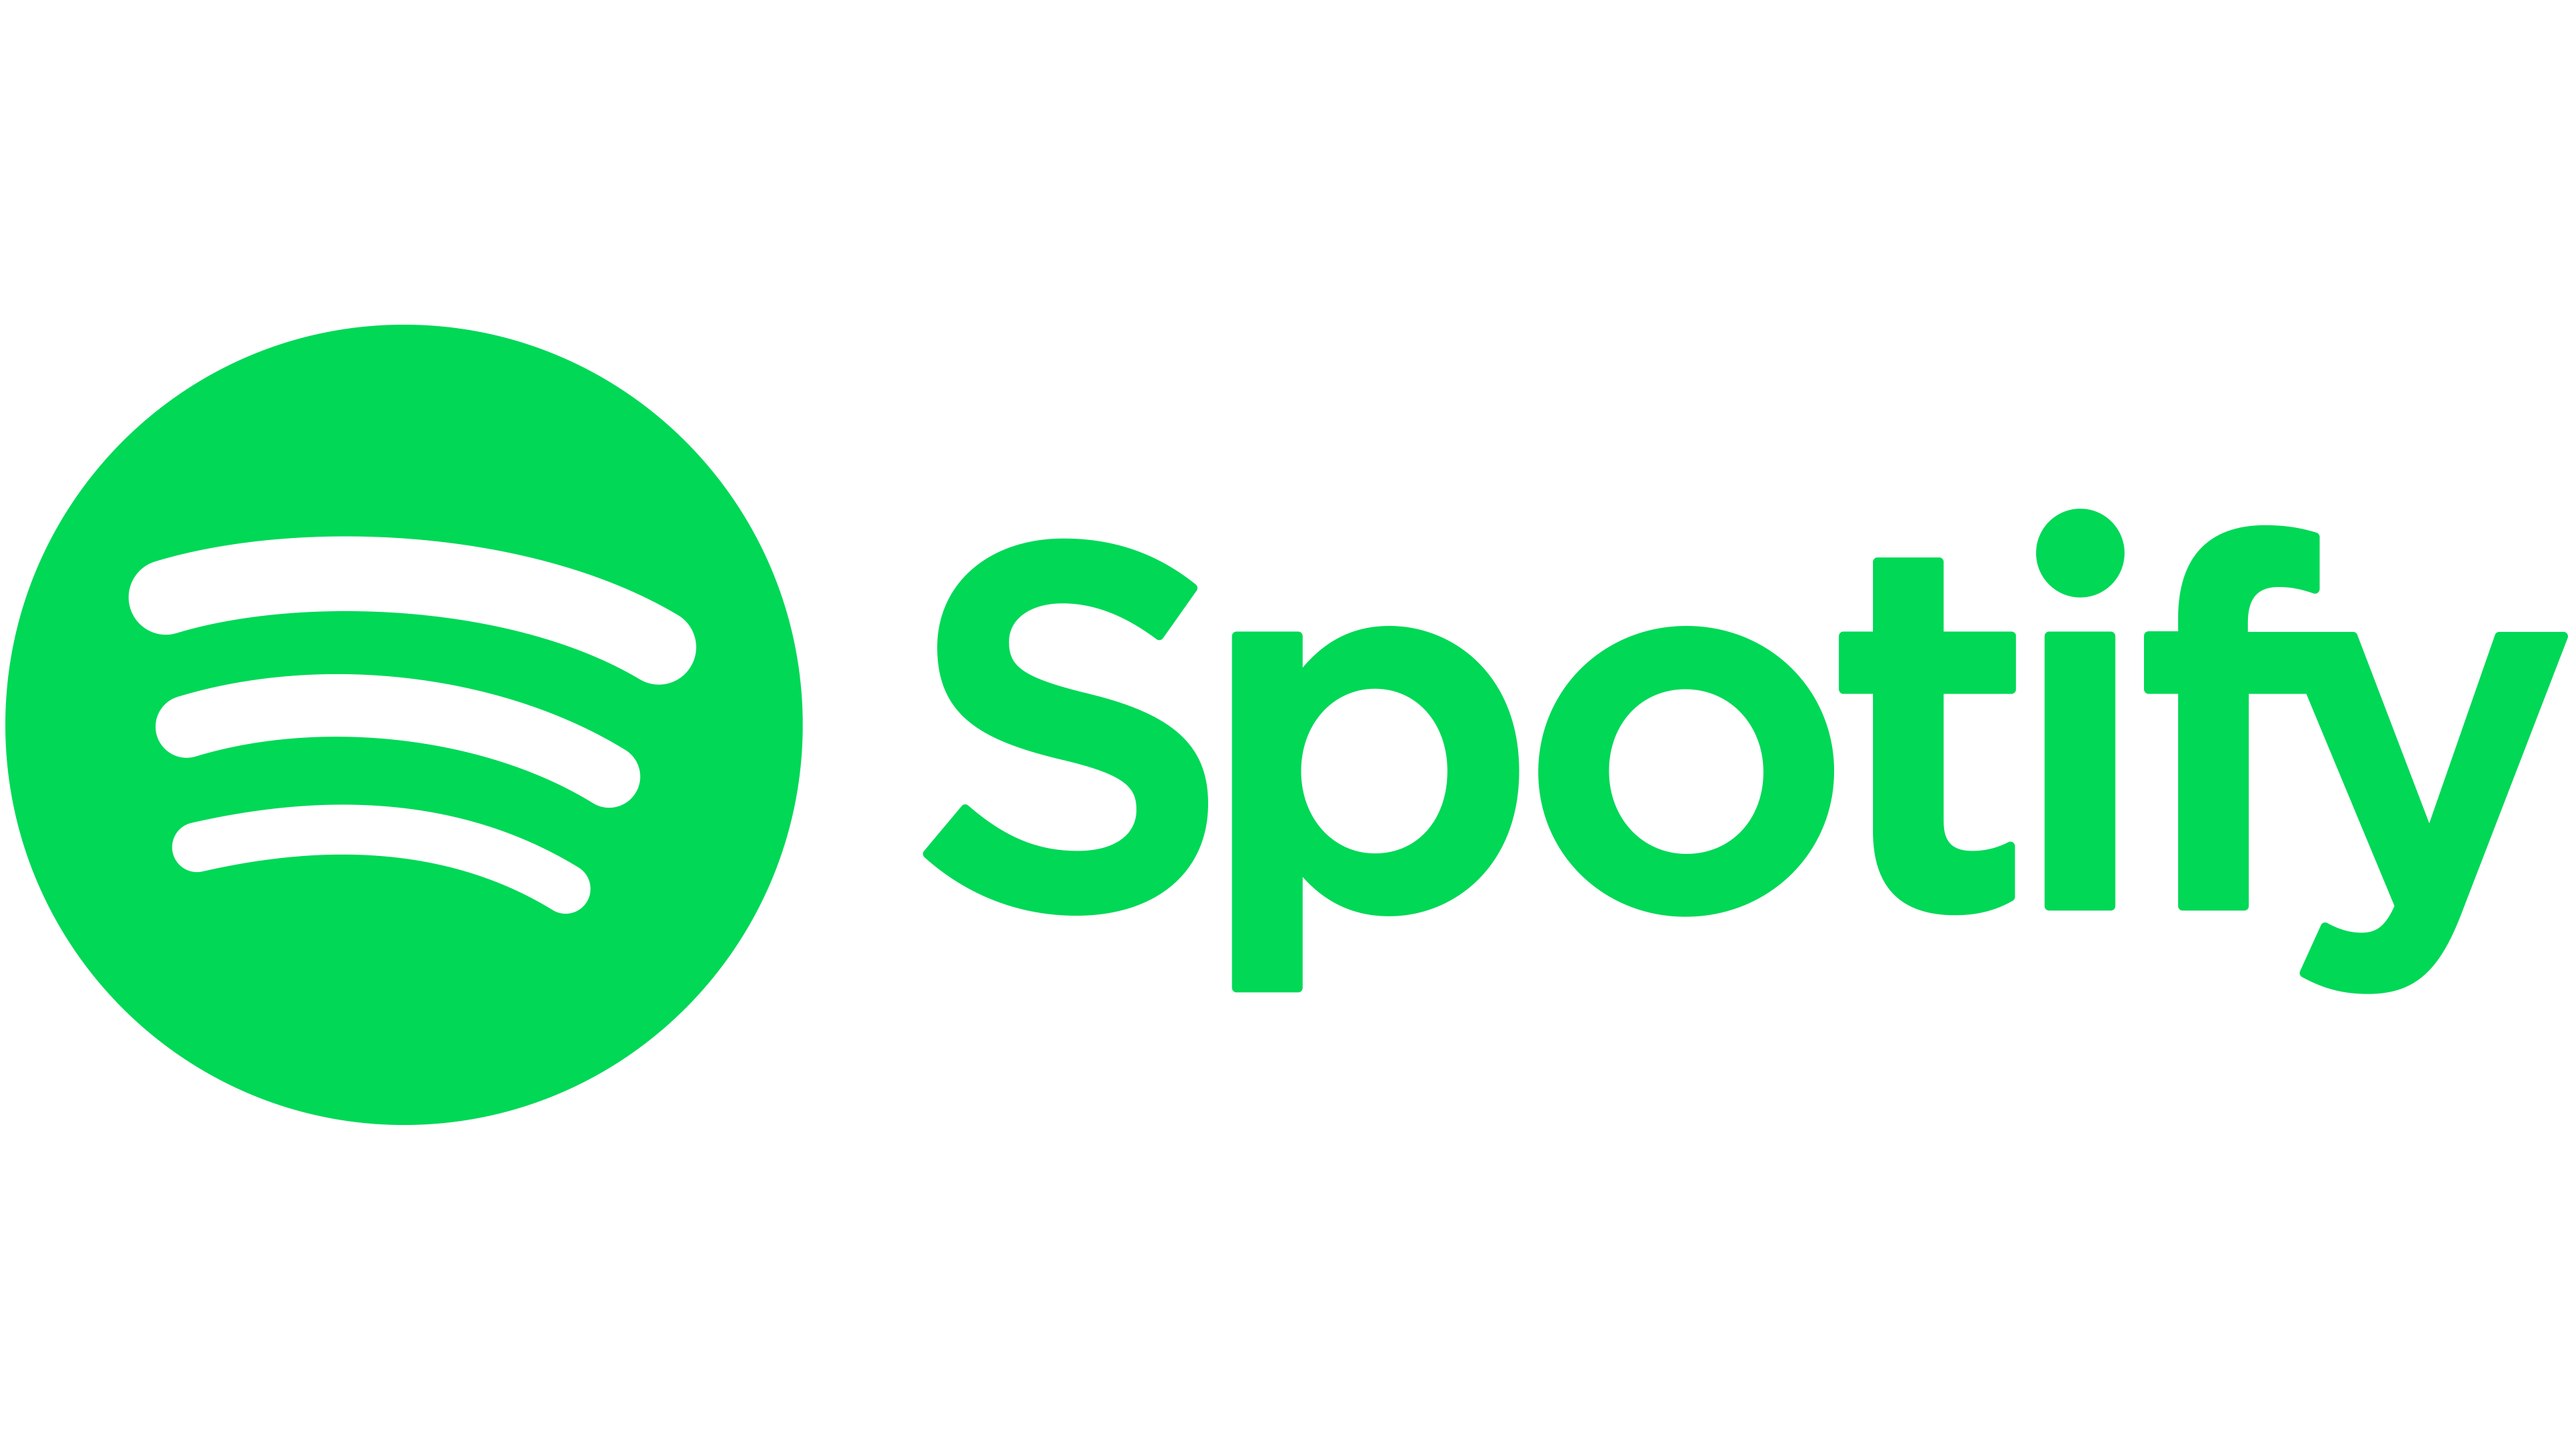

Através da base de dados do spotfy Brasil 2022, reponder as seguintes perguntas.

- Top 5 de artistas mais frequentes
- Top 5 de musica mais frequente
- Top 5 de genero musical mais frequente

- Desafio: Montar um mesmo top 5 apenas do seu genero musical favorito.

Importação de dados

In [141]:
import pandas as pd
url_spotfy = ('/content/drive/MyDrive/Programação em Python para Data Science/Spotfy Brasil.xlsx')

dados_spotfy = pd.read_excel(url_spotfy)
dados_spotfy

,ID,url_da_musica,ranking,nome_da_musica,nome_dos_artistas,artista_individual,id_artista,genero,img_artista,collab,...,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,18370,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",Alok,spotify:artist:0NGAZxHanS9e0iNHpR8f2W,electro house,https://i.scdn.co/image/ab6761610000e5eb83c76c...,1,...,4,0,-5.421000e+03,0.0833,0.152,0.002540,0.0914,0.396,9.199300e+04,193806
1,18371,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",Mc Davi,spotify:artist:1cYhx7ZOhYoVmnDPb9KMwo,funk ostentacao,https://i.scdn.co/image/ab6761610000e5ebe15583...,1,...,4,0,-5.421000e+03,0.0833,0.152,0.002540,0.0914,0.396,9.199300e+04,193806
2,18372,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",MC Marks,spotify:artist:04QHNiih9ZesPvals6II1h,funk carioca,https://i.scdn.co/image/ab6761610000e5ebb44eab...,1,...,6,0,-6.541000e+03,0.2680,0.378,0.000000,0.1360,0.516,1.331330e+16,141770
3,18373,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",Mc Dricka,spotify:artist:4d175LvxCzxt5vHbJyv49q,funk mtg,https://i.scdn.co/image/ab6761610000e5eb68e651...,1,...,6,0,-6.541000e+03,0.2680,0.378,0.000000,0.1360,0.516,1.331330e+16,141770
4,18374,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",MC Hariel,spotify:artist:0pcoadNMmvrUyab1RxWBoV,funk ostentacao,https://i.scdn.co/image/ab6761610000e5eb3cf96b...,1,...,6,0,-6.541000e+03,0.2680,0.378,0.000000,0.1360,0.516,1.331330e+16,141770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29482,24788,spotify:track:1hs2hRwPfyFLoYIf6jY1W7,188,Zero Saudade - Ao Vivo,"Os Barões Da Pisadinha, Maiara & Maraisa",Maiara & Maraisa,spotify:artist:59jlthNnbmim5l9tmNA7se,sertanejo pop,https://i.scdn.co/image/ab6761610000e5eb5c4fb6...,1,...,11,0,-2.506000e+03,0.0720,0.553,0.000003,0.2650,0.592,1.300380e+16,174759
29483,27805,spotify:track:1hs2hRwPfyFLoYIf6jY1W7,199,Zero Saudade - Ao Vivo,"Os Barões Da Pisadinha, Maiara & Maraisa",Os Barões Da Pisadinha,spotify:artist:5Lv2GUVwqmQBPwrTrxucE5,arrocha,https://i.scdn.co/image/ab6761610000e5eb4a51c3...,1,...,11,0,-2.506000e+03,0.0720,0.553,0.000003,0.2650,0.592,1.300380e+16,174759
29484,27806,spotify:track:1hs2hRwPfyFLoYIf6jY1W7,199,Zero Saudade - Ao Vivo,"Os Barões Da Pisadinha, Maiara & Maraisa",Maiara & Maraisa,spotify:artist:59jlthNnbmim5l9tmNA7se,sertanejo pop,https://i.scdn.co/image/ab6761610000e5eb5c4fb6...,1,...,11,0,-2.506000e+03,0.0720,0.553,0.000003,0.2650,0.592,1.300380e+16,174759
29485,28130,spotify:track:1hs2hRwPfyFLoYIf6jY1W7,199,Zero Saudade - Ao Vivo,"Os Barões Da Pisadinha, Maiara & Maraisa",Os Barões Da Pisadinha,spotify:artist:5Lv2GUVwqmQBPwrTrxucE5,forro,https://i.scdn.co/image/ab6761610000e5eb4a51c3...,1,...,11,0,-2.506000e+03,0.0720,0.553,0.000003,0.2650,0.592,1.300380e+16,174759


Top 5 artistas

In [116]:
# Top 5 artistas individuais
top_5_artistas_individuais = dados_spotfy['artista_individual'].value_counts().head(5)
display(top_5_artistas_individuais)

,count
artista_individual,
Marí­lia Mendonça,703
Henrique & Juliano,605
Os Barões Da Pisadinha,497
Gusttavo Lima,487
Joío Gomes,409


Top 5 generos

In [114]:
# Top 5 gêneros
top_5_genero = dados_spotfy['genero'].value_counts().head(5)
display(top_5_genero)

,count
genero,
arrocha,4026
funk,3142
funk carioca,2367
sertanejo pop,1735
sertanejo universitario,1401


Top 5 musicas

In [117]:
# Top 5 artistas individuais
top_5_musicas = dados_spotfy['nome_da_musica'].value_counts().head(5)
display(top_5_musicas)

,count
nome_da_musica,
Poesia Acústica 11: Nada Mudou,594
Poesia Acústica #9: Melhor Forma,590
Poesia Acústica #6: Era uma Vez,572
Set dos Casados,440
A Cara do Crime (Nós Incomoda),348


Desafio: Montar um mesmo top 5 apenas do seu genero musical favorito

In [129]:
# Desafio: Montar um mesmo top 5 apenas do seu genero musical favorito
rock_music = dados_spotfy[dados_spotfy["genero"] == "rock"]
top_5_rock_artists = rock_music["artista_individual"].value_counts().head(5)

display(top_5_rock_artists)

,count
artista_individual,
Imagine Dragons,21
Metallica,2
Nirvana,1
